# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

   https://github.com/jstraker1/Data-Science-Summative-1.git



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels as sm
from scipy.stats import pearsonr as pr


In [2]:
# loading the data
df = pd.read_csv("attendance_anonymised-1.csv")

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

df.info() tells us a few useful things. <br>
1) The shape of the dataframe. There are 15 columns and 17053 rows. <br>
2) The data types for each column. There are 8 columns containing integers, and 7 containing objects <br>
3) There are only 30 null values in the dataset, they are all in the 'Usage code'(15 nans) and 'is positive'(15nans) columns
 

In [4]:
df.head()

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


df.head() shows what the dataframe actually looks like, from which we can interpret what might need to be done to make the dataframe more useful. <br>
For example, we can see that the 'Date' column. From df.info(), we know that 'Date' is stored as an integer, which should be changed. 

3. Drop the `Planned End Date` column.


In [5]:
# your code here
df.drop(['Planned End Date'] , axis =1 )

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P


4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [6]:
# viewing all columns to ease renaming them
df.columns

Index(['Person Code', 'Unit Instance Code', 'Calocc Code', 'Surname',
       'Forename', 'Long Description', 'Register Event ID', 'Object ID',
       'Register Event Slot ID', 'Planned Start Date', 'Planned End Date',
       'is Positive', 'Postive Marks', 'Negative Marks', 'Usage Code'],
      dtype='object')

In [7]:
# renaming columns
df.rename(columns = {'Unit Instance Code' : 'Module code' , 'Calocc Code': 'Year' , 'Long Description' : 'Module Name' , 'Register Event ID' : 'Event ID' , 'Register Event Slot ID' : 'Event Slot ID' , 'Planned Start Date': 'Date' ,  'is Positive' : 'Has Attended' , 'Postive Marks' : 'Attended' , 'Negative Marks' : 'NotAttended' , 'Usage Code':'Attendance Code' } , inplace = True)

5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [8]:
# changing date column from an integer to a timestamp
pd.to_datetime(df['Date'])

0       2025-04-03
1       2023-11-03
2       2024-07-03
3       2024-10-09
4       2023-12-27
           ...    
17048   2025-05-25
17049   2025-05-25
17050   2025-02-16
17051   2023-10-01
17052   2023-10-01
Name: Date, Length: 17053, dtype: datetime64[ns]

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



In [9]:
# sorting values by date
df = df.sort_values(by = 'Date')

#filtering for history module
filtered_df = df[df['Module code'] == 1266] 

In [10]:
filtered_df.head()

,Person Code,Module code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Planned End Date,Has Attended,Attended,NotAttended,Attendance Code
16563,496,1266,2023,Ben-Ahmad,Marie,History,846,164,812,2023-01-08,2024-08-09,Y,1,1,P
16564,89,1266,2023,Nkomo,Matthew,History,846,67,812,2023-01-08,2024-08-09,N,0,0,A
9401,66,1266,2023,Ramirez,Jean,History,846,549,812,2023-01-08,2024-08-09,Y,1,1,P
9402,171,1266,2023,Al-Zahra,Donna,History,846,639,812,2023-01-08,2024-08-09,N,0,0,A
5328,251,1266,2023,Torres,Ruth,History,846,927,812,2023-01-08,2024-08-09,N,0,0,A


In [11]:
# making a new dataframe that stores the total attendance for each date/lesson
attendance = pd.DataFrame(filtered_df.groupby(['Date'])['Attended'].mean())
#attendance is from 0-1, as a proportion of students. To convert to percentage,multiply by 100
attendance.head()

,Attended
Date,
2023-01-08,0.533333
2023-01-20,0.500000
2023-06-04,0.500000
2023-06-29,0.500000
2023-07-02,0.400000


<function matplotlib.pyplot.show(close=None, block=None)>

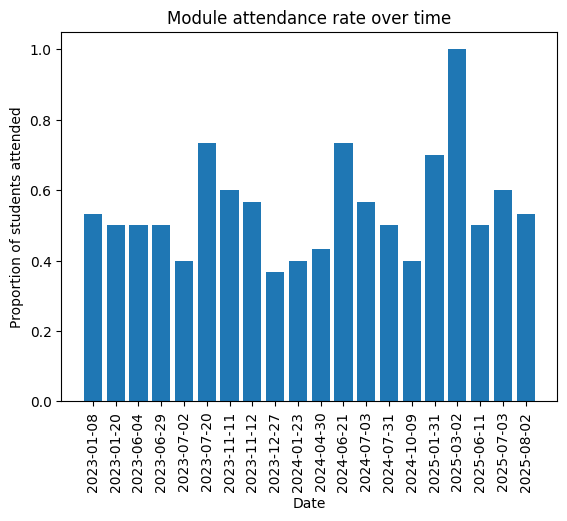

In [12]:
x= attendance.index
y = attendance['Attended']
plt.bar(x , y )
plt.title('Module attendance rate over time')
plt.xlabel('Date')
plt.ylabel('Proportion of students attended')
plt.xticks(rotation = 'vertical')
plt.show

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [13]:
mod_attend = pd.DataFrame(df.groupby(['Module Name'])['Attended'].agg(['mean','std']))
mod_attend.head()

,mean,std
Module Name,,
Algorithms,0.744737,0.436200
Arabic,0.752266,0.432023
Arts & Crafts,0.605263,0.489715
Biology,0.618750,0.486454
Biomedical Engineering,0.650000,0.483046


2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


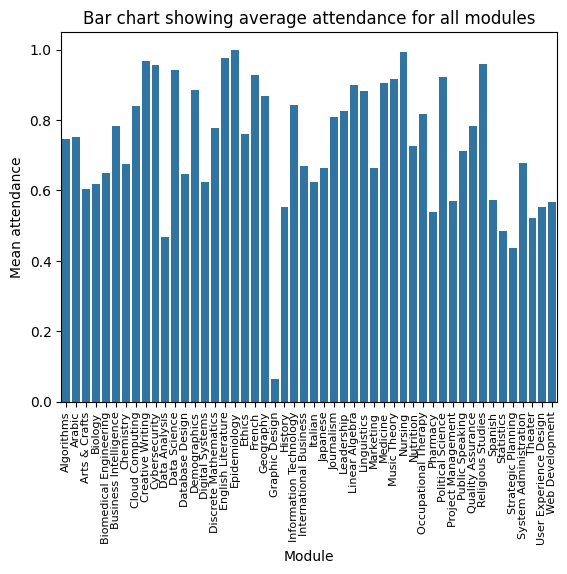

In [14]:
a = mod_attend.index
b = mod_attend['mean']
sns.barplot(data = mod_attend , x = a , y = b , errorbar = ('ci', 95))
plt.xticks(fontsize = 8 , rotation= 90)
plt.title("Bar chart showing average attendance for all modules")
plt.xlabel("Module")
plt.ylabel("Mean attendance")
plt.show()

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show. <br>


The bar chart shows how mean attendance varies for each module. The higher the bar, the higher the average attendance. <br>
The average attendance ranges from >0.1 (Design methods), to approx. 1.0 (epidemiology), it appears that most modules have an average attendance>0.5. <br>
The error bars show the range in which there is a 95% certainty that the attendance figure is true. 


    

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


In [15]:
# mean attendance rate of each module
mod_attend_mean = pd.DataFrame(mod_attend['mean']).reset_index()
mod_attend_mean.head()

,Module Name,mean
0,Algorithms,0.744737
1,Arabic,0.752266
2,Arts & Crafts,0.605263
3,Biology,0.618750
4,Biomedical Engineering,0.650000


In [16]:
# mean overall attendance per student
stud_attend_mean = df.groupby('Person Code')['Attended'].mean().reset_index().rename(columns = {'Attended': 'stud_attend_mean'})

In [17]:
# mean attendence of the students within each module
merger = df.merge(stud_attend_mean, on = 'Person Code').groupby('Module Name')['stud_attend_mean'].mean().reset_index()
merger.head()

,Module Name,stud_attend_mean
0,Algorithms,0.710615
1,Arabic,0.647835
2,Arts & Crafts,0.705918
3,Biology,0.636538
4,Biomedical Engineering,0.701747


In [18]:
final = merger.merge(mod_attend_mean, on = 'Module Name').rename(columns = {'mean' : 'mod_attend_mean'})
final.head()

,Module Name,stud_attend_mean,mod_attend_mean
0,Algorithms,0.710615,0.744737
1,Arabic,0.647835,0.752266
2,Arts & Crafts,0.705918,0.605263
3,Biology,0.636538,0.618750
4,Biomedical Engineering,0.701747,0.650000


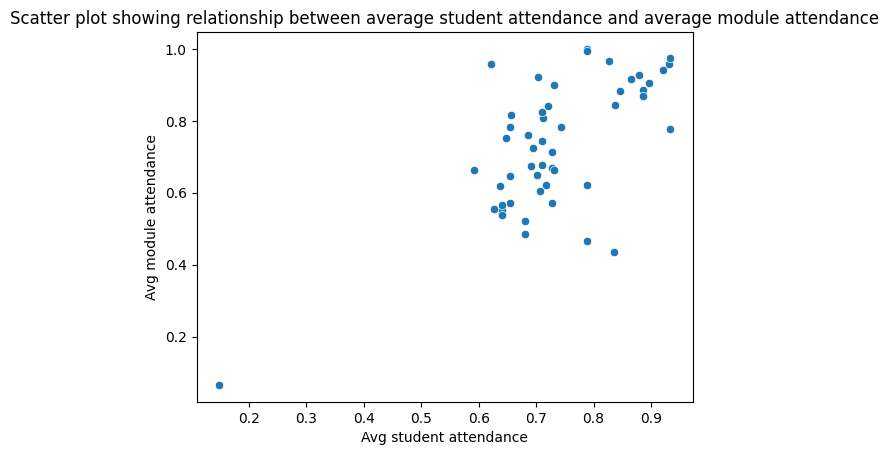

In [19]:
# finding the correlation coefficient between student attendance and the attendance of their module
sns.scatterplot(data = final , x = 'stud_attend_mean' , y = 'mod_attend_mean')
plt.title("Scatter plot showing relationship between average student attendance and average module attendance")
plt.xlabel("Avg student attendance")
plt.ylabel("Avg module attendance")
plt.show()


In [20]:
# finding correlation coefficient and p-value 
print(pr(final['stud_attend_mean'], final['mod_attend_mean']))


PearsonRResult(statistic=np.float64(0.6828461522382471), pvalue=np.float64(4.6863158878295244e-08))


In [21]:
print("the correlation coefficient is 0.68 , and the p-value is 4.69e-8")


the correlation coefficient is 0.68 , and the p-value is 4.69e-8


The correlation coefficient (0.68), indicates that there is a strong positive relationship between the attendance of a module and the attendance of the students who take the module. The scatter graph above shows this, as there is a clear positive direction of data points. <br>
The p-value (4.69e-8), is extremely low, suggesting that this correlation is statistically significant, and highly unlikely to occur by chance. 

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!